In [1]:
from keras.models import load_model
from keras.models import Model
import numpy as np
from PIL import Image
import os 
import matplotlib.pyplot as plt
import cv2

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from skimage.metrics import mean_squared_error as mse
from matplotlib.patches import Ellipse

Using TensorFlow backend.


In [2]:
## load test data and normalize it

# testData = "C:/Users/mostafaosama2/Desktop/autoenctrain/test"
testData = "../../Data/100Images"
new_test = []

for filename in os.listdir(testData):
    if filename.endswith('.tif'):
        image = Image.open(os.path.join(testData, filename)) 
        new_test.append(np.asarray( image, dtype="uint8" ))
        
x_test = np.asarray(new_test)
x_test = x_test.astype('float32') / 255.
x_test.shape

(79, 96, 96, 3)

In [2]:
## Data loading, and standardizing
directory = "../../Data/Kather_all"

kather_test = []

# Test on 1000 images
for filename in os.listdir(directory):
    if filename.endswith('.tif'):
        image = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_UNCHANGED)
        resized_image = cv2.resize(image, (96, 96)) 
        kather_test.append(np.asarray( resized_image, dtype="uint8" ))
        
kather_test = np.asarray(kather_test)
kather_test = kather_test.astype('float32') / 255.
kather_test.shape

(5000, 96, 96, 3)

In [8]:
## Data loading, and standardizing
directory = "../../Data/Kather_all"

kather_test = []

# Test on 1000 images
for filename in os.listdir(directory):
    if filename.endswith('.tif'):
        image = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_UNCHANGED)
        resized_image = cv2.resize(image, (144, 144)) 
        kather_test.append(np.asarray( resized_image, dtype="uint8" ))
        
kather_test = np.asarray(kather_test)
kather_test = kather_test.astype('float32') / 255.
kather_test.shape

(5000, 144, 144, 3)

In [3]:
kather_test[0:25].shape

(25, 96, 96, 3)

In [20]:
def loadAndEvaluateModel(model , dataMatrix):
    mseList = []
    autoencoder = load_model(model, compile=False) 
#     print(autoencoder.summary())
    decoded_imgs = autoencoder.predict(dataMatrix[0:25])
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(dataMatrix[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i])
        mseList.append(mse(dataMatrix[i],decoded_imgs[i]))
#         plt.imshow(decoded_imgs[0][i]) # regression autoenc
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.savefig('MSErec.png')
    plt.show()
   
    print("Average MSE (normalized pixels) : {}".format(sum(mseList) / len(mseList)))
#     return mseList

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


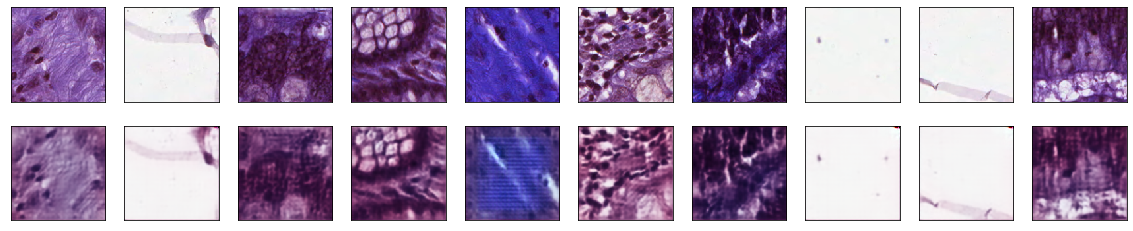

Average MSE (normalized pixels) : 0.005862627093859392


In [21]:
loadAndEvaluateModel('SavedModels/weights/CAE-SSIM/23FebruarySSIM_epochs1000_batch16_adam.h5', kather_test[0:25])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 144, 144, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 144, 144, 16)      448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 144, 144, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 144, 144, 32)      4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 144, 144, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 144, 144, 32)      128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        1849

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


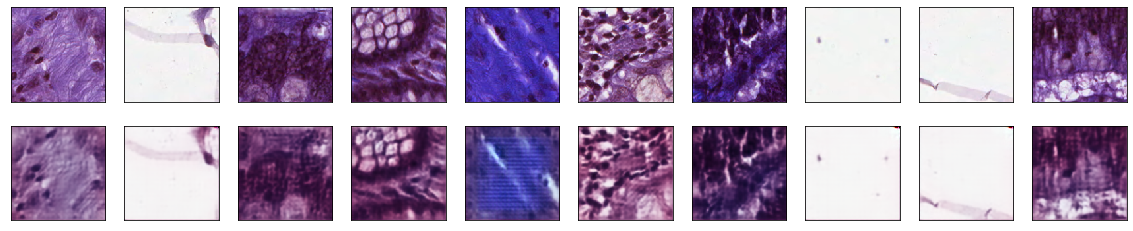

Average MSE (normalized pixels) : 0.005862627093859392


In [19]:
loadAndEvaluateModel('SavedModels/weights/CAE-SSIM/feb_epochs1000_batch16_adam_-0.854192843653939.h5', kather_test[0:25])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

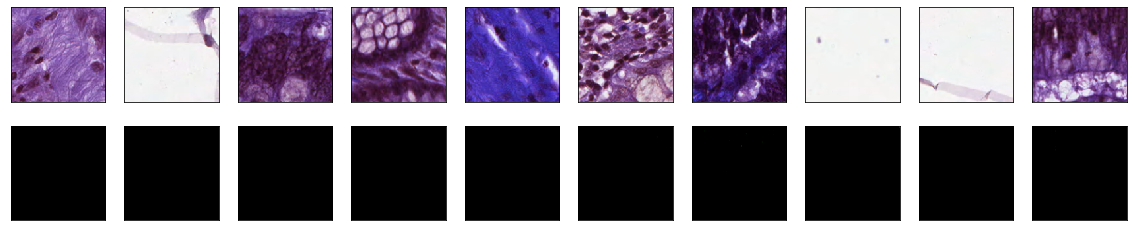

Average MSE (normalized pixels) : 1.58091754539111


In [14]:
loadAndEvaluateModel('SavedModels/weights/CAE-SSIM/feb_epochs1000_batch32_adam_-0.7463415344556172.h5', kather_test[0:25])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


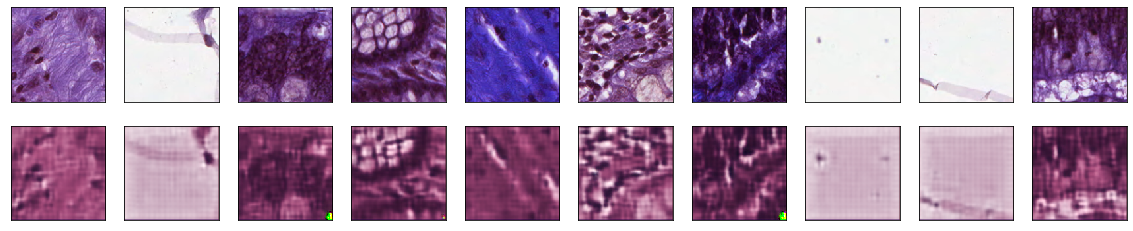

Average MSE (normalized pixels) : 0.052779871636350714


In [15]:
loadAndEvaluateModel('SavedModels/weights/CAE-SSIM/February15SSIM_epochs1000_batch16_adam.h5', kather_test[0:25])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

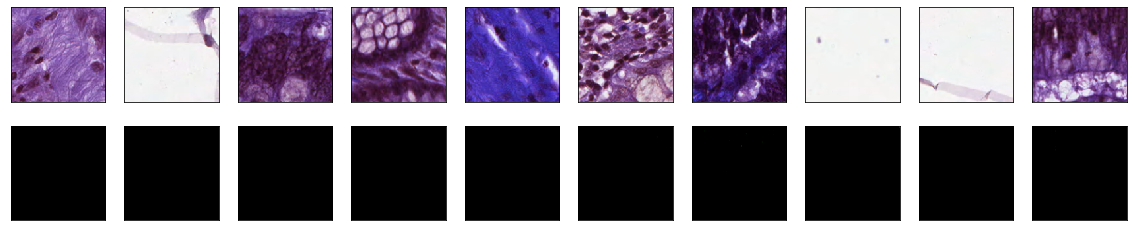

Average MSE (normalized pixels) : 1.58091754539111


In [16]:
loadAndEvaluateModel('SavedModels/weights/CAE-SSIM/FebruarySSIM_epochs1000_batch32_adam.h5', kather_test[0:25])

W0109 01:46:46.257213 4321239936 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0109 01:46:46.527740 4321239936 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


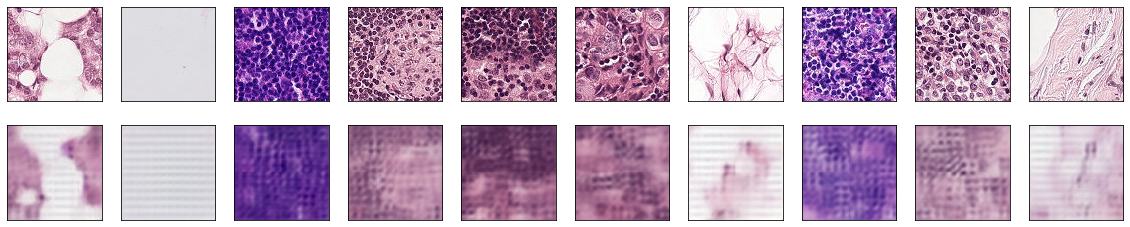

In [17]:
loadAndEvaluateModel('SavedModels/mean_squared_error_epochs300_batch64_bad.h5')

W0108 16:21:30.190757 4321239936 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0108 16:21:33.972105 4321239936 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0108 16:25:12.902957 4321239936 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0108 16:25:13.035610 4321239936 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0108 16:25:13.088088 4321239936 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] f

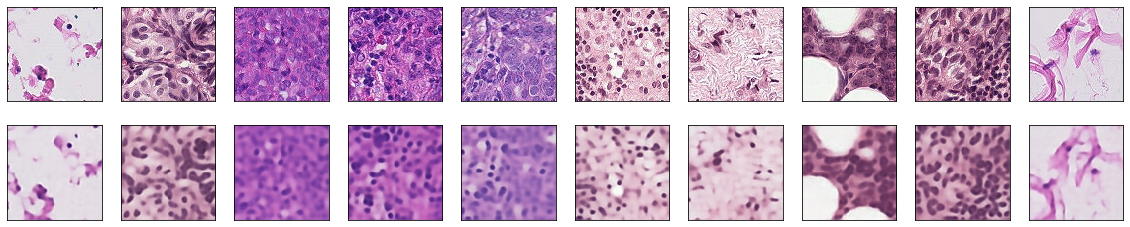

In [5]:
loadAndEvaluateModel('SavedModels/fulldata_checkpoint_epochs10000_batch32_adam.h5')

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 96, 96, 3)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 96, 96, 16)        448       
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 96, 96, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 96, 96, 32)        4640      
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 48, 48, 64)        1849

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


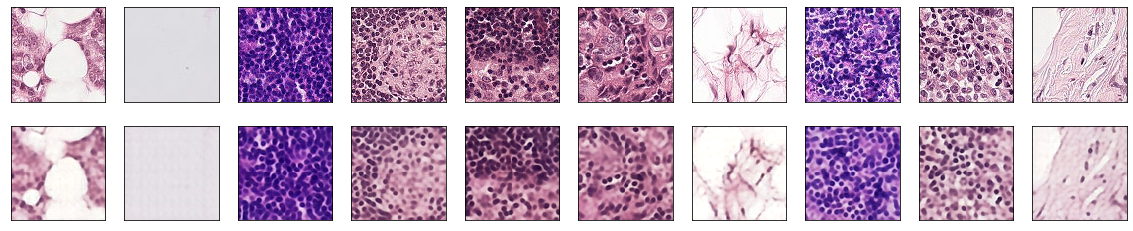

Average MSE (normalized pixels) : 0.012963607280298089


[0.006880712251031205,
 0.0004739022963898339,
 0.011811446649888624,
 0.024973400128003555,
 0.014169253718801863,
 0.013613875363243969,
 0.004918924831019833,
 0.021263805687012312,
 0.02175378643195393,
 0.00977696544563575]

In [9]:
mselist = loadAndEvaluateModel('SavedModels/autoencoder_train_epochs100_batch32_best.h5', x_test)
# print("average is {}".format(sum(mselist)/len(mselist)))
mselist

W1225 15:14:09.861701 4321239936 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


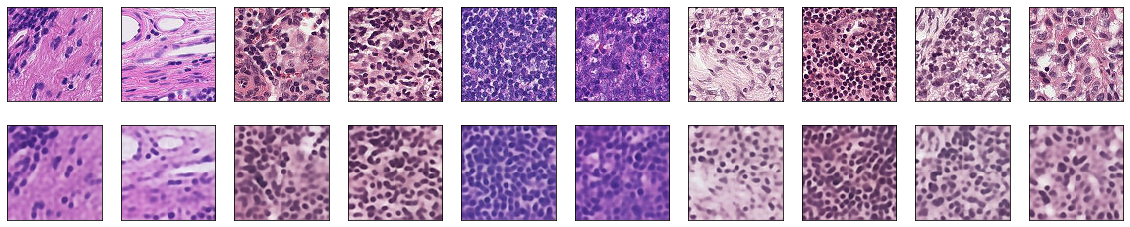

In [7]:
loadAndEvaluateModel('SavedModels/autoencoder_train_epochs100_batch32_adam.h5')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


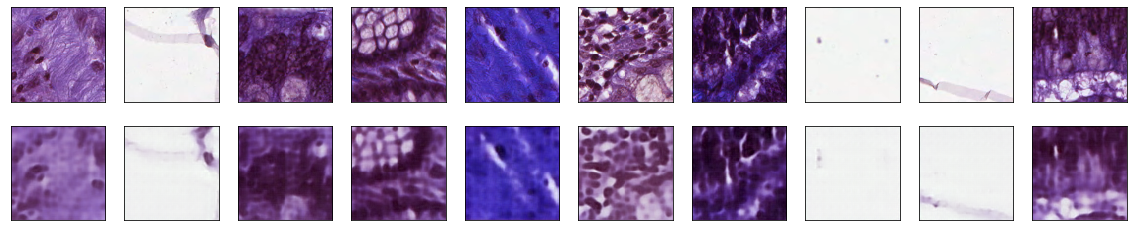

Average Mse : 0.0040232520376844326


[0.0044224945785061205,
 0.000834822111468408,
 0.003311243561152077,
 0.005864438298271735,
 0.003278402932853086,
 0.01138098230815441,
 0.0053835573703289825,
 0.00016409709277615895,
 0.0005496798718384712,
 0.005042802251494883]

In [25]:
mselist = loadAndEvaluateModel('SavedModels/feb_epochs1000_batch32_adam.h5', kather_test)
mselist

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


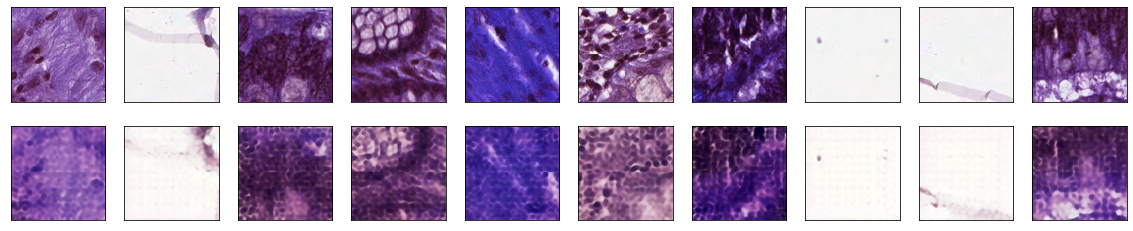

Average Mse : 0.012750573699778039


[0.01060128853969142,
 0.00355252242343441,
 0.011760168074388297,
 0.022165473360126444,
 0.010440320140081172,
 0.033395688885322856,
 0.019085105838234348,
 0.001066164684866523,
 0.0022000206624520034,
 0.013238984389182928]

In [24]:
mselist = loadAndEvaluateModel('SavedModels/autoencoder_train_epochs100_batch32_best.h5', kather_test)
mselist

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


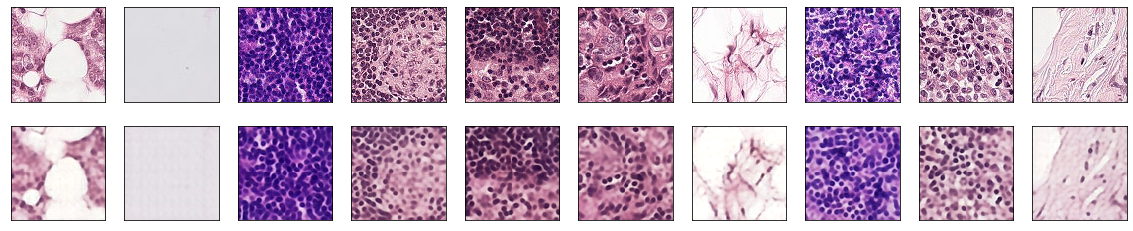

Average Mse : 0.012963607280298089


[0.006880712251031205,
 0.0004739022963898339,
 0.011811446649888624,
 0.024973400128003555,
 0.014169253718801863,
 0.013613875363243969,
 0.004918924831019833,
 0.021263805687012312,
 0.02175378643195393,
 0.00977696544563575]

In [20]:
mselist = loadAndEvaluateModel('SavedModels/autoencoder_train_epochs100_batch32_best.h5', x_test)
mselist